In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("updated_train.csv")

In [3]:
df

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0
...,...,...,...
5282,train_6856,The spread of the novel among asylum seekers o...,1
5283,train_6857,Hundreds of Jewish patients are being treated...,1
5284,train_6858,Beats me Honestly most of the people I follow ...,0
5285,train_6859,Help us reach more people by donating and shar...,0


In [4]:
df  = df.drop("ID",axis=1)

In [5]:
df

,text,target
0,The bitcoin halving is cancelled due to,1
1,MercyOfAllah In good times wrapped in its gran...,0
2,266 Days No Digital India No Murder of e learn...,1
3,India is likely to run out of the remaining RN...,1
4,In these tough times the best way to grow is t...,0
...,...,...
5282,The spread of the novel among asylum seekers o...,1
5283,Hundreds of Jewish patients are being treated...,1
5284,Beats me Honestly most of the people I follow ...,0
5285,Help us reach more people by donating and shar...,0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

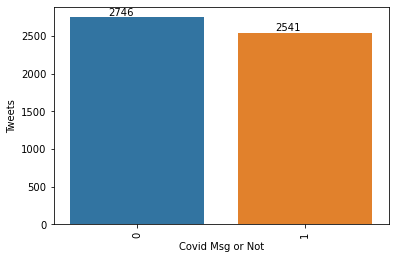

In [7]:
ax = sns.countplot(x="target", data=df)
plt.setp(ax.get_xticklabels(), rotation=90)
#axes.set_title('Polarity Score By Dates')
plt.xlabel('Covid Msg or Not')
plt.ylabel('Tweets')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [8]:
from wordcloud import WordCloud

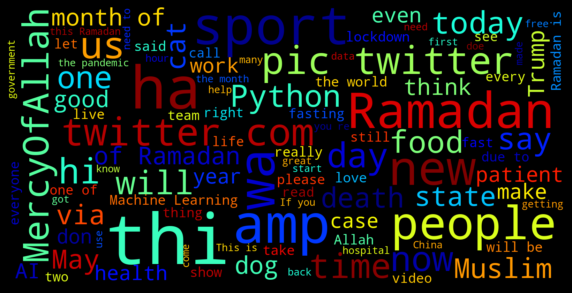

In [9]:
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=200,colormap='jet',max_words=100).generate(allWords)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
import re
import ftfy
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\NILESH
[nltk_data]     VERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\NILESH
[nltk_data]     VERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
def cleanTxt(text):
    text = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", text).split()) #remove punctuation
    text = ftfy.fix_text(text) #fix weirdly encoded texts 
    text = text.lower() # all to lower latter
    #stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    #Word Lemmatization
    text = WordNetLemmatizer().lemmatize(text,"v")
    #joining text
    text = ' '.join(filtered_sentence)
    return text

In [12]:
%%time
# Clean the tweets
df['clean_text'] = df['text'].apply(cleanTxt)

Wall time: 3.33 s


In [13]:
df

,text,target,clean_text
0,The bitcoin halving is cancelled due to,1,bitcoin halving cancelled due
1,MercyOfAllah In good times wrapped in its gran...,0,mercyofallah good times wrapped granular detai...
2,266 Days No Digital India No Murder of e learn...,1,266 days digital india murder e learning 2g on...
3,India is likely to run out of the remaining RN...,1,india likely run remaining rna kits essential ...
4,In these tough times the best way to grow is t...,0,tough times best way grow learn case teach hel...
...,...,...,...
5282,The spread of the novel among asylum seekers o...,1,spread novel among asylum seekers adds pile al...
5283,Hundreds of Jewish patients are being treated...,1,hundreds jewish patients treated arab practiti...
5284,Beats me Honestly most of the people I follow ...,0,beats honestly people follow sports fans l sha...
5285,Help us reach more people by donating and shar...,0,help us reach people donating sharing ramadan ...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
%time
#Train and evaluate the model
vect = TfidfVectorizer(ngram_range=(1,1),stop_words='english').fit(df.clean_text)
text_vectorized = vect.transform(df.clean_text)

Wall time: 0 ns


In [17]:
print("Length of Vocabulary:", len(vect.vocabulary_))
print("Shape of Train Data:", text_vectorized.shape)

Length of Vocabulary: 13986
Shape of Train Data: (5287, 13986)


In [18]:
from yellowbrick.text import FreqDistVisualizer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


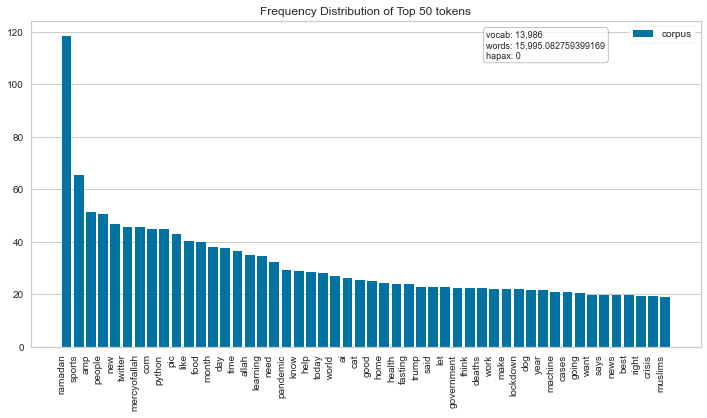

In [19]:
features   = vect.get_feature_names()
fig, ax = plt.subplots(figsize=(12,6))
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(text_vectorized)
visualizer.show()

# Model Creation Start

In [20]:
# IMPORTING MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
# IMPORTING SCORING PARAMETERS
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score, accuracy_score,matthews_corrcoef
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [21]:
# vOTING cLASSIFIRE
clf1 = LogisticRegression(C = 0.1,random_state=0,solver='saga')
clf2 = SGDClassifier(loss='log',max_iter=1, tol=1e-1)
eclf1 = VotingClassifier(estimators=[('lr', clf1),('sg',clf2)],voting ='soft')

In [22]:
clf = {
"MultinomialNB": MultinomialNB(alpha = 0.5),
"SGDClassifier": SGDClassifier(loss='log',max_iter=10, tol=1e-3),
"LogisticRegression": LogisticRegression(C = 1.1,random_state=0,solver='saga'),
"BernoulliNB": BernoulliNB(),
"RidgeClassifier":RidgeClassifier(alpha=1.1,normalize=True,max_iter=100,class_weight="balanced",solver='auto',random_state=0),
"RandomForestClassifier":RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0),
"PassiveAggressiveClassifier":PassiveAggressiveClassifier(),
"Perceptron":Perceptron(tol=1e-3, random_state=0),
"Ensemble_Voting_Model":eclf1,
"LinearSVC":LinearSVC(class_weight='balanced',random_state=0,C=1.1,max_iter=100)
}

In [23]:
%%time
result = []
m = []
for name, model in clf.items():
    scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity/recall': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0),
    'precision': make_scorer(precision_score),
    'f1':make_scorer(f1_score),
    'roc_auc':make_scorer(roc_auc_score),
    'Mcc':make_scorer(matthews_corrcoef)
    }
    cv_results = cross_validate(model,text_vectorized, df.target, cv=10, scoring=scoring)
    print("----------------------------------")
    print(name)
    print("----------------------------------")
    cr = pd.DataFrame(cv_results)
    cr = cr.append({'Model': name}, ignore_index=True)
    testre = cr.drop(['fit_time', 'score_time'], axis=1)
    print(testre.mean(axis = 0))
    #print(name)
    m.append(name)
    result.append(testre.mean(axis = 0))
result = pd.DataFrame(result)
result.insert(0, "Model",m, True)
result

----------------------------------
MultinomialNB
----------------------------------
test_accuracy              0.876865
test_sensitivity/recall    0.845709
test_specificity           0.905678
test_precision             0.892532
test_f1                    0.868276
test_roc_auc               0.875693
test_Mcc                   0.754105
dtype: float64
----------------------------------
SGDClassifier
----------------------------------
test_accuracy              0.902215
test_sensitivity/recall    0.955526
test_specificity           0.852869
test_precision             0.857611
test_f1                    0.903811
test_roc_auc               0.904197
test_Mcc                   0.810089
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packag

----------------------------------
LogisticRegression
----------------------------------
test_accuracy              0.902970
test_sensitivity/recall    0.960644
test_specificity           0.849590
test_precision             0.855507
test_f1                    0.904933
test_roc_auc               0.905117
test_Mcc                   0.812419
dtype: float64
----------------------------------
BernoulliNB
----------------------------------
test_accuracy              0.891051
test_sensitivity/recall    0.865784
test_specificity           0.914415
test_precision             0.903907
test_f1                    0.884131
test_roc_auc               0.890099
test_Mcc                   0.782508
dtype: float64
----------------------------------
RidgeClassifier
----------------------------------
test_accuracy              0.847924
test_sensitivity/recall    0.846904
test_specificity           0.848848
test_precision             0.838937
test_f1                    0.842604
test_roc_auc               0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packag

----------------------------------
Ensemble_Voting_Model
----------------------------------
test_accuracy              0.901647
test_sensitivity/recall    0.946864
test_specificity           0.859788
test_precision             0.862284
test_f1                    0.902467
test_roc_auc               0.903326
test_Mcc                   0.807581
dtype: float64
----------------------------------
LinearSVC
----------------------------------
test_accuracy              0.902972
test_sensitivity/recall    0.945289
test_specificity           0.863796
test_precision             0.865688
test_f1                    0.903572
test_roc_auc               0.904543
test_Mcc                   0.809828
dtype: float64
Wall time: 4.25 s


,Model,test_accuracy,test_sensitivity/recall,test_specificity,test_precision,test_f1,test_roc_auc,test_Mcc
0,MultinomialNB,0.876865,0.845709,0.905678,0.892532,0.868276,0.875693,0.754105
1,SGDClassifier,0.902215,0.955526,0.852869,0.857611,0.903811,0.904197,0.810089
2,LogisticRegression,0.902970,0.960644,0.849590,0.855507,0.904933,0.905117,0.812419
3,BernoulliNB,0.891051,0.865784,0.914415,0.903907,0.884131,0.890099,0.782508
4,RidgeClassifier,0.847924,0.846904,0.848848,0.838937,0.842604,0.847876,0.696000
5,RandomForestClassifier,0.628907,0.236929,0.991627,0.962787,0.379354,0.614278,0.353089
6,PassiveAggressiveClassifier,0.893136,0.913804,0.874000,0.870695,0.891553,0.893902,0.787567
7,Perceptron,0.878383,0.890996,0.866713,0.861051,0.875663,0.878854,0.757327
8,Ensemble_Voting_Model,0.901647,0.946864,0.859788,0.862284,0.902467,0.903326,0.807581
9,LinearSVC,0.902972,0.945289,0.863796,0.865688,0.903572,0.904543,0.809828


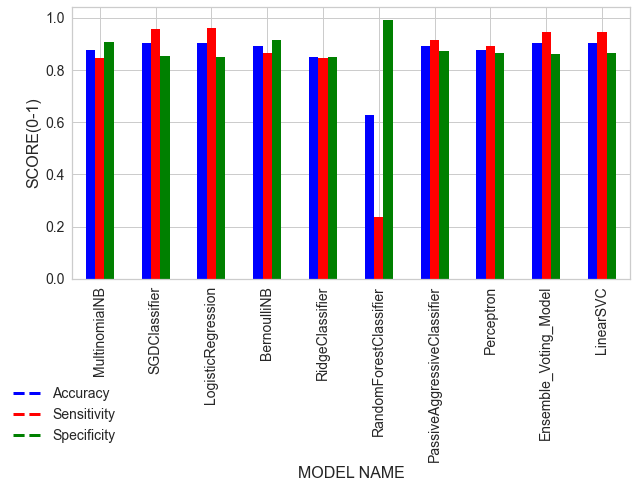

In [24]:
from matplotlib.lines import Line2D
locs = ["upper left", "lower left", "center right"]
ax = result.plot(x="Model", y=["test_accuracy", "test_sensitivity/recall", "test_specificity"], kind="bar",figsize=(10, 5),fontsize=14,color=['blue', 'red', 'green'])
ax.set_xlabel("MODEL NAME",fontsize=16)
ax.set_ylabel("SCORE(0-1)",fontsize=16)
#ax.set_title('Sentiment Analysis Model Comparison',fontsize=20)
#ax.legend(loc=1, bbox_to_anchor=(0.15,0.01))
colors = ['blue', 'red', 'green']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors]
labels = ['Accuracy', 'Sensitivity', 'Specificity']
plt.legend(lines, labels,loc='center right', bbox_to_anchor=(0.1, -0.5),fontsize=14)
#plt.legend(lines, labels)

In [25]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [26]:
result = result.sort_values(by=['test_accuracy'],ascending=False)
result = result.reset_index(drop=True)

In [27]:
columns = ['test_accuracy', 'test_sensitivity/recall', 'test_specificity', 'test_precision','test_f1', 'test_roc_auc','test_Mcc']

In [28]:
result[columns] = ( 100 * result[columns]).round(2).astype(str) + '%'

In [29]:
result.style.apply(highlight_max)

,Model,test_accuracy,test_sensitivity/recall,test_specificity,test_precision,test_f1,test_roc_auc,test_Mcc
0,LinearSVC,90.3%,94.53%,86.38%,86.57%,90.36%,90.45%,80.98%
1,LogisticRegression,90.3%,96.06%,84.96%,85.55%,90.49%,90.51%,81.24%
2,SGDClassifier,90.22%,95.55%,85.29%,85.76%,90.38%,90.42%,81.01%
3,Ensemble_Voting_Model,90.16%,94.69%,85.98%,86.23%,90.25%,90.33%,80.76%
4,PassiveAggressiveClassifier,89.31%,91.38%,87.4%,87.07%,89.16%,89.39%,78.76%
5,BernoulliNB,89.11%,86.58%,91.44%,90.39%,88.41%,89.01%,78.25%
6,Perceptron,87.84%,89.1%,86.67%,86.11%,87.57%,87.89%,75.73%
7,MultinomialNB,87.69%,84.57%,90.57%,89.25%,86.83%,87.57%,75.41%
8,RidgeClassifier,84.79%,84.69%,84.88%,83.89%,84.26%,84.79%,69.6%
9,RandomForestClassifier,62.89%,23.69%,99.16%,96.28%,37.94%,61.43%,35.31%


In [30]:
model = LogisticRegression(C = 1.1,random_state=0,solver='saga')

In [31]:
%%time
model.fit(text_vectorized, df.target)
predict_train = model.predict(text_vectorized)

Wall time: 30 ms


In [32]:
#model Training Accuracy
print("Accuracy:", metrics.accuracy_score(df.target,predict_train))

Accuracy: 0.9701153773406469


In [33]:
#predication function
def predcovidmsg(text):
    text = cleanTxt(text)
    vtext = vect.transform([text])
    result = model.predict_proba(vtext)
    return result

In [42]:
data = "Man it s terrible Not even a reason to get on here until sports start back"
prediction = predcovidmsg(data)
prediction

array([[0.90669876, 0.09330124]])

In [45]:
[prediction[0][0]*100,prediction[0][1]*100]

[90.66987645466457, 9.330123545335416]

In [35]:
import pickle

In [36]:
# Creating a pickle file for the TfidfVectorizer
pickle.dump(vect, open('tf-vect-transform.pkl', 'wb'))

In [37]:
# Creating a pickle file for the Logistic Regression model
filename = 'covid-msg-lr-model.pkl'
pickle.dump(model, open(filename, 'wb'))

# xAI Implementation

In [38]:
import eli5

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [39]:
eli5.show_weights(model, vec=vect, top=10)

In [40]:
df.text[4]

'In these tough times the best way to grow is to learn or in my case teach to help people learn to connect Sports and Anal'

In [41]:
eli5.show_prediction(model,df.text[4],vec=vect,target_names=['not covid-19-related', 'covid-19-related'])